In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path = "/content/aerofit_treadmill.csv"
df = pd.read_csv(data_path)

In [ ]:
df.head

<bound method NDFrame.head of     Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     KP281   18    Male         14        Single      3        4   29562   
1     KP281   19    Male         15        Single      2        3   31836   
2     KP281   19  Female         14     Partnered      4        3   30699   
3     KP281   19    Male         12        Single      3        3   32973   
4     KP281   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   KP781   40    Male         21        Single      6        5   83416   
176   KP781   42    Male         18        Single      5        4   89641   
177   KP781   45    Male         16        Single      5        5   90886   
178   KP781   47    Male         18     Partnered      4        5  104581   
179   KP781   48    Male         18     Partnered      4        5   95508   

     Miles  
0      112  
1       75  
2     

In [ ]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns:{df.shape[1]}")

Number of rows: 180
Number of columns:9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
print('\nColumns with missing value:')
print(df.isnull().any())


Columns with missing value:
Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool


# **Observations:**
*   No missing/Null values in the data.
*   3 unique products in the dataset and KP281 is the most frequent/commonly used product.
*   Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.
*   Out of 180 data points, 104's gender is Male and rest are the female.
*   Standard deviation for Income & Miles is very high. These variables might have the outliers in it.

**Univariate Analysis:**
Understanding the distribution of the data for the quantitative attributes:
1. Age
2. Education
3. Usage
4. Fitness
5. Income
6. Miles

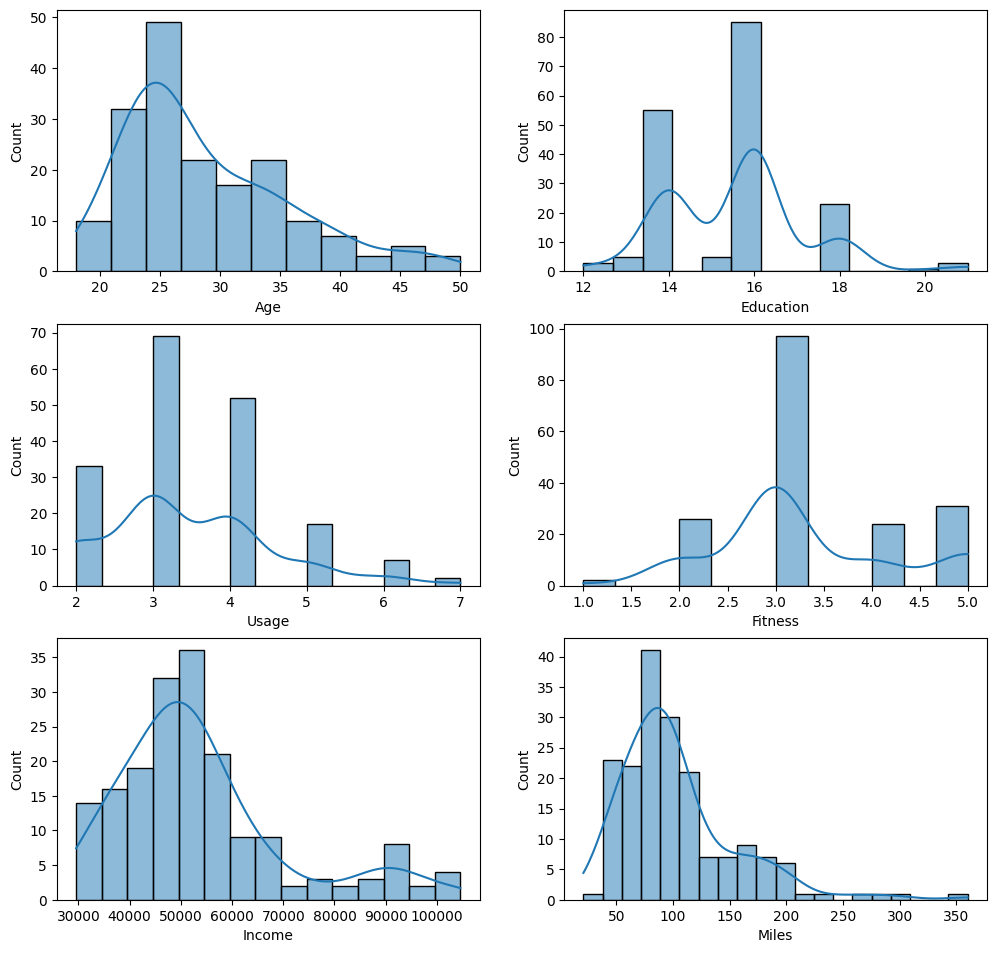

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

**Outliers detection using BoxPlots**

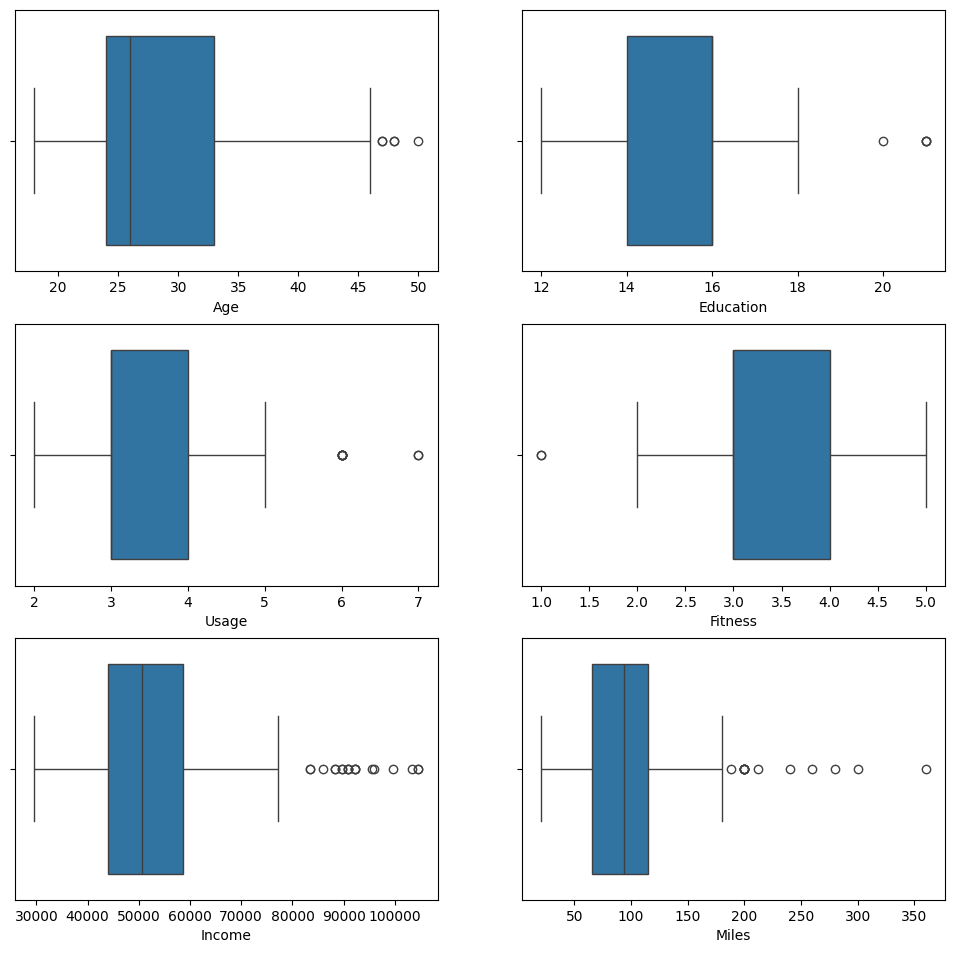

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.0)
sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

# **Observations:**

Even from the boxplots it is quite clear that:


*   *Age, Education and Usage* are having very few outliers.
*   While *Income and Miles* are having more outliers.


Understanding the distribution of the data for the qualitative attributes:
1. Product
2. Gender
3. MaritalStatus

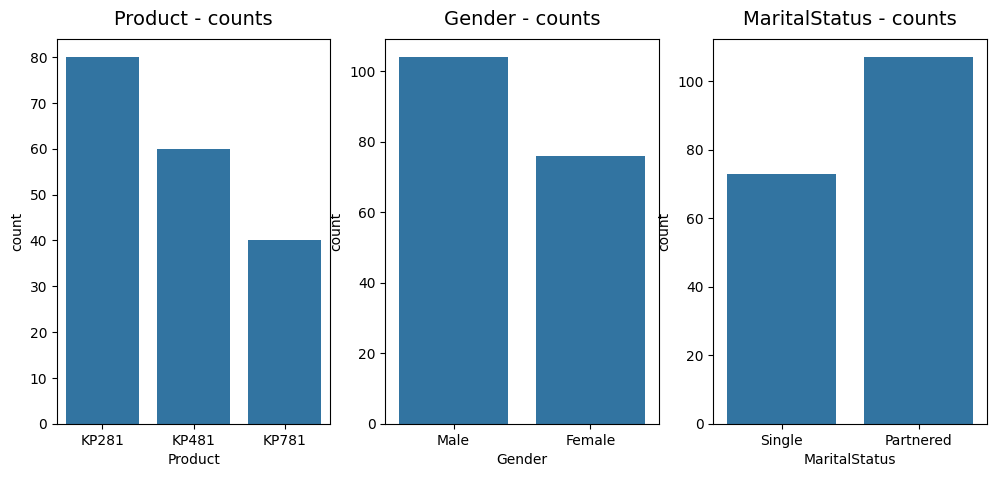

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])
axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10,fontsize=14)
plt.show()

# **Observations**
1. KP281 is the most frequent product.
2. There are more Males in the data than Females.
3. More Partnered persons are there in the data.

In [ ]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

# **Observations:**
**Product Details**
> 44.44% of the customers have purchased KP2821 product.

> 33.33% of the customers have purchased KP481 product.

> 22.22% of the customers have purchased KP781 product.

**Gender Details**


> 57.78% of the customers are Male.

**MaritalStatus**

> 59.44% of the customers are Partnered.

# **Bivariate Analysis:**
Checking if features - Gender or MaritalStatus have any effect on the product purchased.

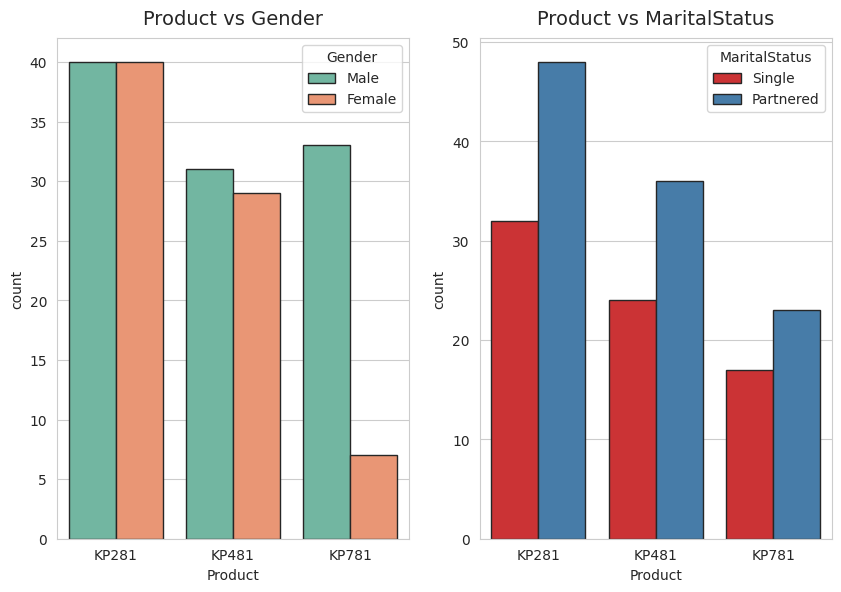

In [ ]:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15",
palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus',
edgecolor="0.15", palette='Set1', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

# **Observations**
1. **Product vs Gender:**
- The purchases of the KP281 product by males and females are almost equal, mirroring the trend for the KP481 product.
- Intriguingly, the KP781 product is predominantly favored by male customers.

2. **Product vs MaritalStatus:**
- Partnered customers exhibit a significantly higher inclination towards purchasing the product.

Checking if following features have any effect on the product purchased:
1. Age
2. Education
3. Usage
4. Fitness
5. Income
6. Miles

<ipython-input-25-cb975daf818c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product', y=attrs[count],ax=axs[i,j], palette='Set3')
<ipython-input-25-cb975daf818c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product', y=attrs[count],ax=axs[i,j], palette='Set3')
<ipython-input-25-cb975daf818c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product', y=attrs[count],ax=axs[i,j], palette='Set3')
<ipython-input-25-cb975daf818c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

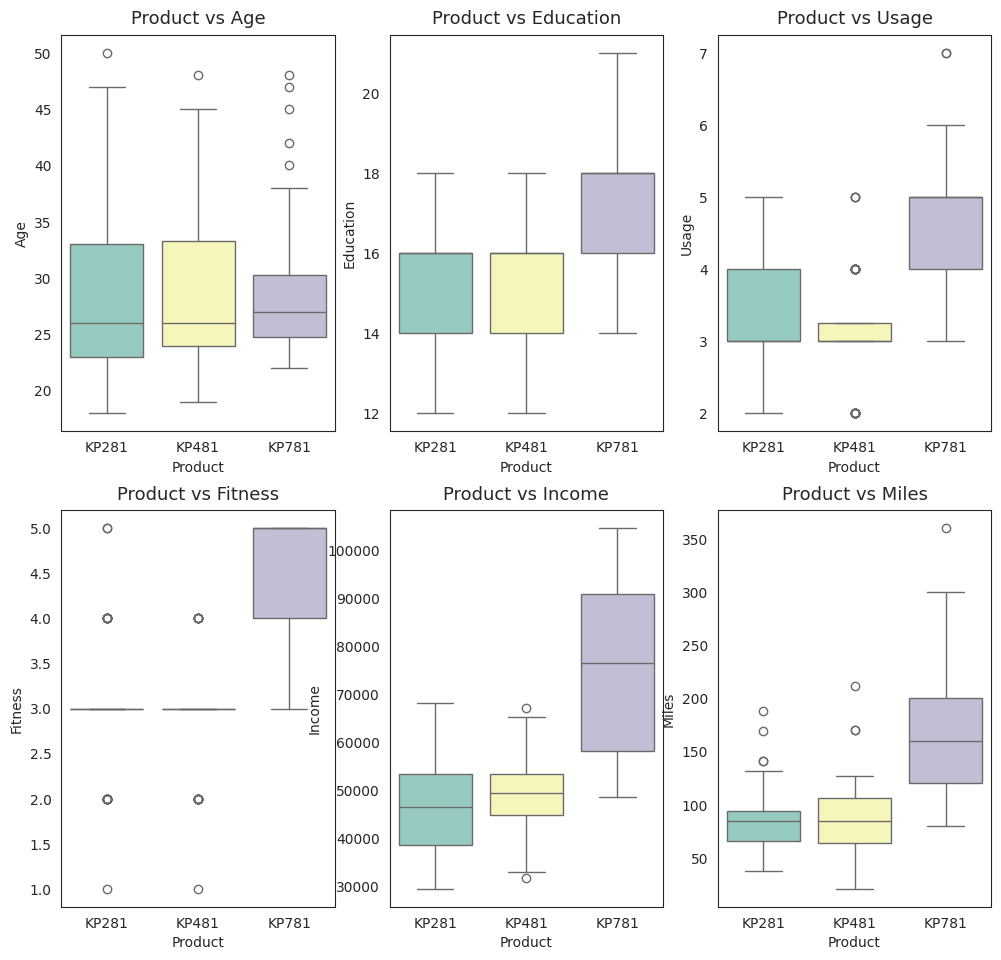

In [ ]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income','Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.subplots_adjust(top=1.2)
count = 0

for i in range(2):
  for j in range(3):
    sns.boxplot(data=df, x='Product', y=attrs[count],ax=axs[i,j], palette='Set3')
    axs[i,j].set_title(f"Product vs {attrs[count]}",pad=8, fontsize=13)
    count += 1

# **Observations:**

**Product vs Age:** Customers purchasing products KP281 & KP481 have the same median age value. Customers aged between 25-30 are more inclined to buy the KP781 product.

**Product vs Education:** Customers with an education level greater than 16 are more likely to purchase the KP781 product. Customers with an education level less than 16 have an equal chance of purchasing KP281 or KP481.

**Product vs Usage:** Customers planning to use the treadmill more than 4 times a week are more likely to purchase the KP781 product. Other customers are more likely to purchase KP281 or KP481.

**Product vs Fitness:** Customers with a fitness level of 3 or higher have a higher likelihood of purchasing the KP781 product.

**Product vs Income:** Customers with an income of $60,000 or more have a higher chance of purchasing the KP781 product.

**Product vs Miles:** If the customer expects to walk/run more than 120 miles per week, they are more likely to buy the KP781 product.

# **Multivariate Analysis**

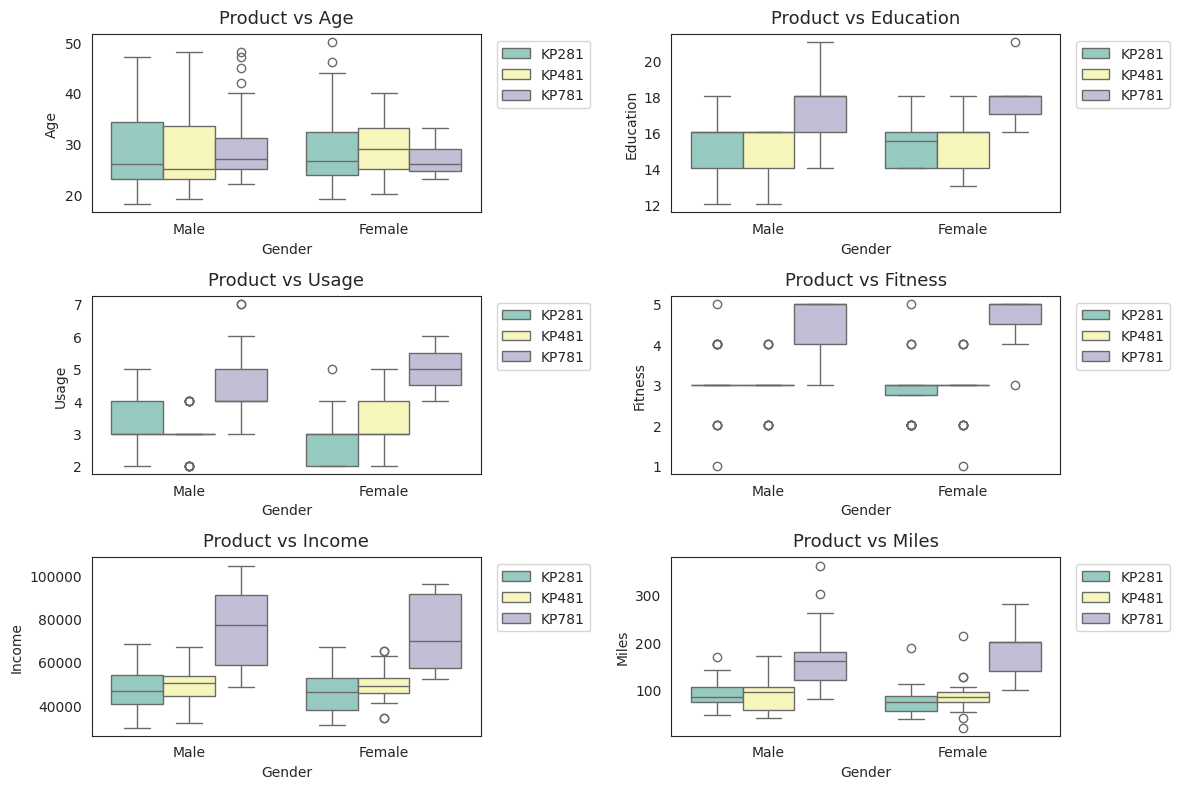

In [ ]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.subplots_adjust(top=1)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attrs[count], hue='Product', ax=axs[i, j], palette='Set3')
        axs[i, j].set_title(f"Product vs {attrs[count]}", pad=8, fontsize=13)
        axs[i, j].legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))  # Adjust the position of the legend
        count += 1

plt.tight_layout()
plt.show()

# **Observations**
**Product vs. Age:** There appears to be a positive correlation between age and product usage for all three products (KP281, KP481, and KP781). This means that older people tend to use the products more than younger people.

**Product vs. Gender:** There appears to be a difference in product usage between males and females for all three products. Males tend to use KP281 and KP781 more than females, while females tend to use KP481 more than males.

**Product vs. Education:** There appears to be a positive correlation between education level and product usage for all three products. This means that people with higher levels of education tend to use the products more than people with lower levels of education.

**Product vs. Fitness:** There appears to be a positive correlation between fitness level and product usage for KP281 and KP481. This means that people who are more fit tend to use these products more than people who are less fit. However, there is no clear correlation between fitness level and product usage for KP781.

**Product vs. Income:** There appears to be a positive correlation between income level and product usage for all three products. This means that people with higher incomes tend to use the products more than people with lower incomes.

**Product vs. Usage:** There appears to be a positive correlation between product usage and income level. This means that people who use the products more tend to have higher incomes.

**Product vs. Miles:** There appears to be a positive correlation between the number of miles driven and product usage for KP281 and KP781. This means that people who drive more miles tend to use these products more than people who drive fewer miles. However, there is no clear correlation between the number of miles driven and product usage for KP481.

# **Computing Marginal & Conditional Probabilities:**

1.   **Marginal Probability**



In [ ]:
df['Product'].value_counts(normalize=True)


KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

2. **Conditional Probabilities**
  
    Probability of each product given gender:

In [ ]:
def p_prod_given_gender(gender, print_marginal=False):
    # Check if gender is valid
    if gender not in ["Female", "Male"]:
        return "Invalid gender value."

    # Calculate conditional probabilities
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()

    # Print marginal probabilities if requested
    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")

    # Print conditional probabilities
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")

# Call the function for Male and Female genders with optional marginal printing
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')


P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53

